<a href="https://colab.research.google.com/github/pos-tech-ia-devs/tech-challenge-1/blob/main/tech_challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tech Challenge - Fase 01

## Integrantes

- Romulo de Oliveira Assis
romuloassis.as@gmail.com

- Gabriel Longarete Mandelli
gabriel-mandelli@hotmail.com

- Antonio Marcos Fernandes Silva
antoniomarcos997@gmail.com

- Thiago Mendes
thimns@gmail.com

- ROMULO QUEIROZ LIMA DE SOUSA
romuloqueiroz100@gmail.com

## Importar libs necessárias

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Importar dataset

In [ ]:
df = pd.read_csv('insurance.csv')
df.head()

,idade,genero,imc,filhos,fumante,região,encargos
0,19,female,27.900,0,yes,sudoeste,16884.92400
1,18,male,33.770,1,no,sudeste,1725.55230
2,28,male,33.000,3,no,sudeste,4449.46200
3,33,male,22.705,0,no,noroeste,21984.47061
4,32,male,28.880,0,no,noroeste,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idade     1338 non-null   int64  
 1   genero    1338 non-null   object 
 2   imc       1338 non-null   float64
 3   filhos    1338 non-null   int64  
 4   fumante   1338 non-null   object 
 5   região    1338 non-null   object 
 6   encargos  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


> Não temos dados nulos, mas temos strings

## Pré-processamento e limpeza dos dados

Podemos ver que temos dados no valor de string, como por exemplo:

**gênero**:
- masculino
- feminino

**fumante**:
- sim
- não

**região**:
- noroeste
- nordeste
- sudeste
- sudoeste

Então analisando entre **One Hot Enconding** e o **Label Enconding**, acredito que o **One Hot Encondig** seja mais aplicavél nesse caso, pois as variáveis categóricas não possuem uma ordem que o modelo deve inferir.

Corre o risco de induzir o algoritmo a entender que uma categoria tem mais importância que outra

In [ ]:
dum_df = pd.get_dummies(df, columns=['fumante', 'genero', 'região'])
dum_df.head()

,idade,imc,filhos,encargos,fumante_no,fumante_yes,genero_female,genero_male,região_nordeste,região_noroeste,região_sudeste,região_sudoeste
0,19,27.900,0,16884.92400,False,True,True,False,False,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,False,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,False,True,False,True,False,False


## Análise exploratória


In [ ]:
dum_df.dtypes

,0
idade,int64
imc,float64
filhos,int64
encargos,float64
fumante_no,bool
fumante_yes,bool
genero_female,bool
genero_male,bool
região_nordeste,bool
região_noroeste,bool


In [ ]:
dum_df.isnull().sum()

,0
idade,0
imc,0
filhos,0
encargos,0
fumante_no,0
fumante_yes,0
genero_female,0
genero_male,0
região_nordeste,0
região_noroeste,0


> Como não temos dados nulos não temos a necessidade de fazer tratamentos

In [ ]:
df.describe()

,idade,imc,filhos,encargos
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Explorando as variáveis unicamente

### Fumantes

In [ ]:
df.groupby('fumante').describe()

idade                                                          imc  \
          count       mean        std   min    25%   50%   75%   max   count   
fumante                                                                        
no       1064.0  39.385338  14.083410  18.0  26.75  40.0  52.0  64.0  1064.0   
yes       274.0  38.514599  13.923186  18.0  27.00  38.0  49.0  64.0   274.0   

                    ... filhos      encargos                              \
              mean  ...    75%  max    count          mean           std   
fumante             ...                                                    
no       30.651795  ...    2.0  5.0   1064.0   8434.268298   5993.781819   
yes      30.708449  ...    2.0  5.0    274.0  32050.231832  11541.547176   

                                                                           
                min           25%          50%           75%          max  
fumante                                                                    
no        1121.8739   3986.438700   7345.40530  11362.887050  36910.60803  
yes      12829.4551  20826.244213  34456.34845  41019.207275  63770.42801  

[2 rows x 32 columns]

### Gênero


In [ ]:
df.groupby('genero').describe()

idade                                                         imc  \
        count       mean        std   min   25%   50%    75%   max  count   
genero                                                                      
female  662.0  39.503021  14.054223  18.0  27.0  40.0  51.75  64.0  662.0   
male    676.0  38.917160  14.050141  18.0  26.0  39.0  51.00  64.0  676.0   

                   ... filhos      encargos                              \
             mean  ...    75%  max    count          mean           std   
genero             ...                                                    
female  30.377749  ...    2.0  5.0    662.0  12569.578844  11128.703801   
male    30.943129  ...    2.0  5.0    676.0  13956.751178  12971.025915   

                                                                     
              min        25%         50%           75%          max  
genero                                                               
female  1607.5101  4885.1587  9412.96250  14454.691825  63770.42801  
male    1121.8739  4619.1340  9369.61575  18989.590250  62592.87309  

[2 rows x 32 columns]

### Região

In [ ]:
df.groupby('região').describe()

idade                                                         imc  \
          count       mean        std   min    25%   50%   75%   max  count   
região                                                                        
nordeste  324.0  39.268519  14.069007  18.0  27.00  39.5  51.0  64.0  324.0   
noroeste  325.0  39.196923  14.051646  19.0  26.00  39.0  51.0  64.0  325.0   
sudeste   364.0  38.939560  14.164585  18.0  26.75  39.0  51.0  64.0  364.0   
sudoeste  325.0  39.455385  13.959886  19.0  27.00  39.0  51.0  64.0  325.0   

                     ... filhos      encargos                              \
               mean  ...    75%  max    count          mean           std   
região               ...                                                    
nordeste  29.173503  ...    2.0  5.0    324.0  13406.384516  11255.803066   
noroeste  29.199785  ...    2.0  5.0    325.0  12417.575374  11072.276928   
sudeste   33.355989  ...    2.0  5.0    364.0  14735.411438  13971.098589   
sudoeste  30.596615  ...    2.0  5.0    325.0  12346.937377  11557.179101   

                                                                         
                min          25%           50%         75%          max  
região                                                                   
nordeste  1694.7964  5194.322288  10057.652025  16687.3641  58571.07448  
noroeste  1621.3402  4719.736550   8965.795750  14711.7438  60021.39897  
sudeste   1121.8739  4440.886200   9294.131950  19526.2869  63770.42801  
sudoeste  1241.5650  4751.070000   8798.593000  13462.5200  52590.82939  

[4 rows x 32 columns]

### Análise das distribuições dos dados

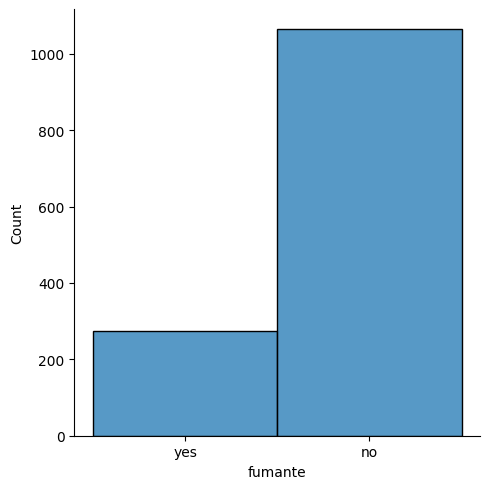

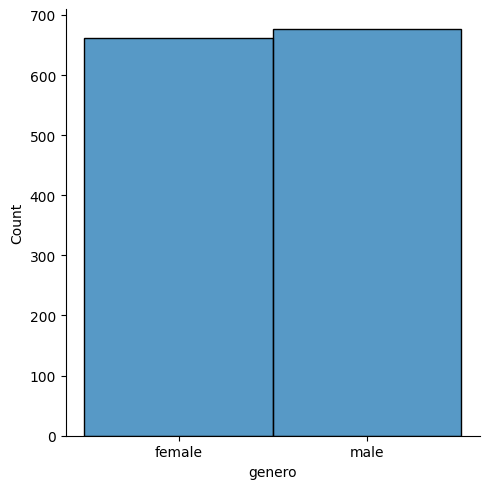

In [ ]:
features = ['fumante', 'genero']

for feature in features:
  sns.displot(data=df[feature])

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'imc'}>],
       [<Axes: title={'center': 'filhos'}>,
        <Axes: title={'center': 'encargos'}>]], dtype=object)

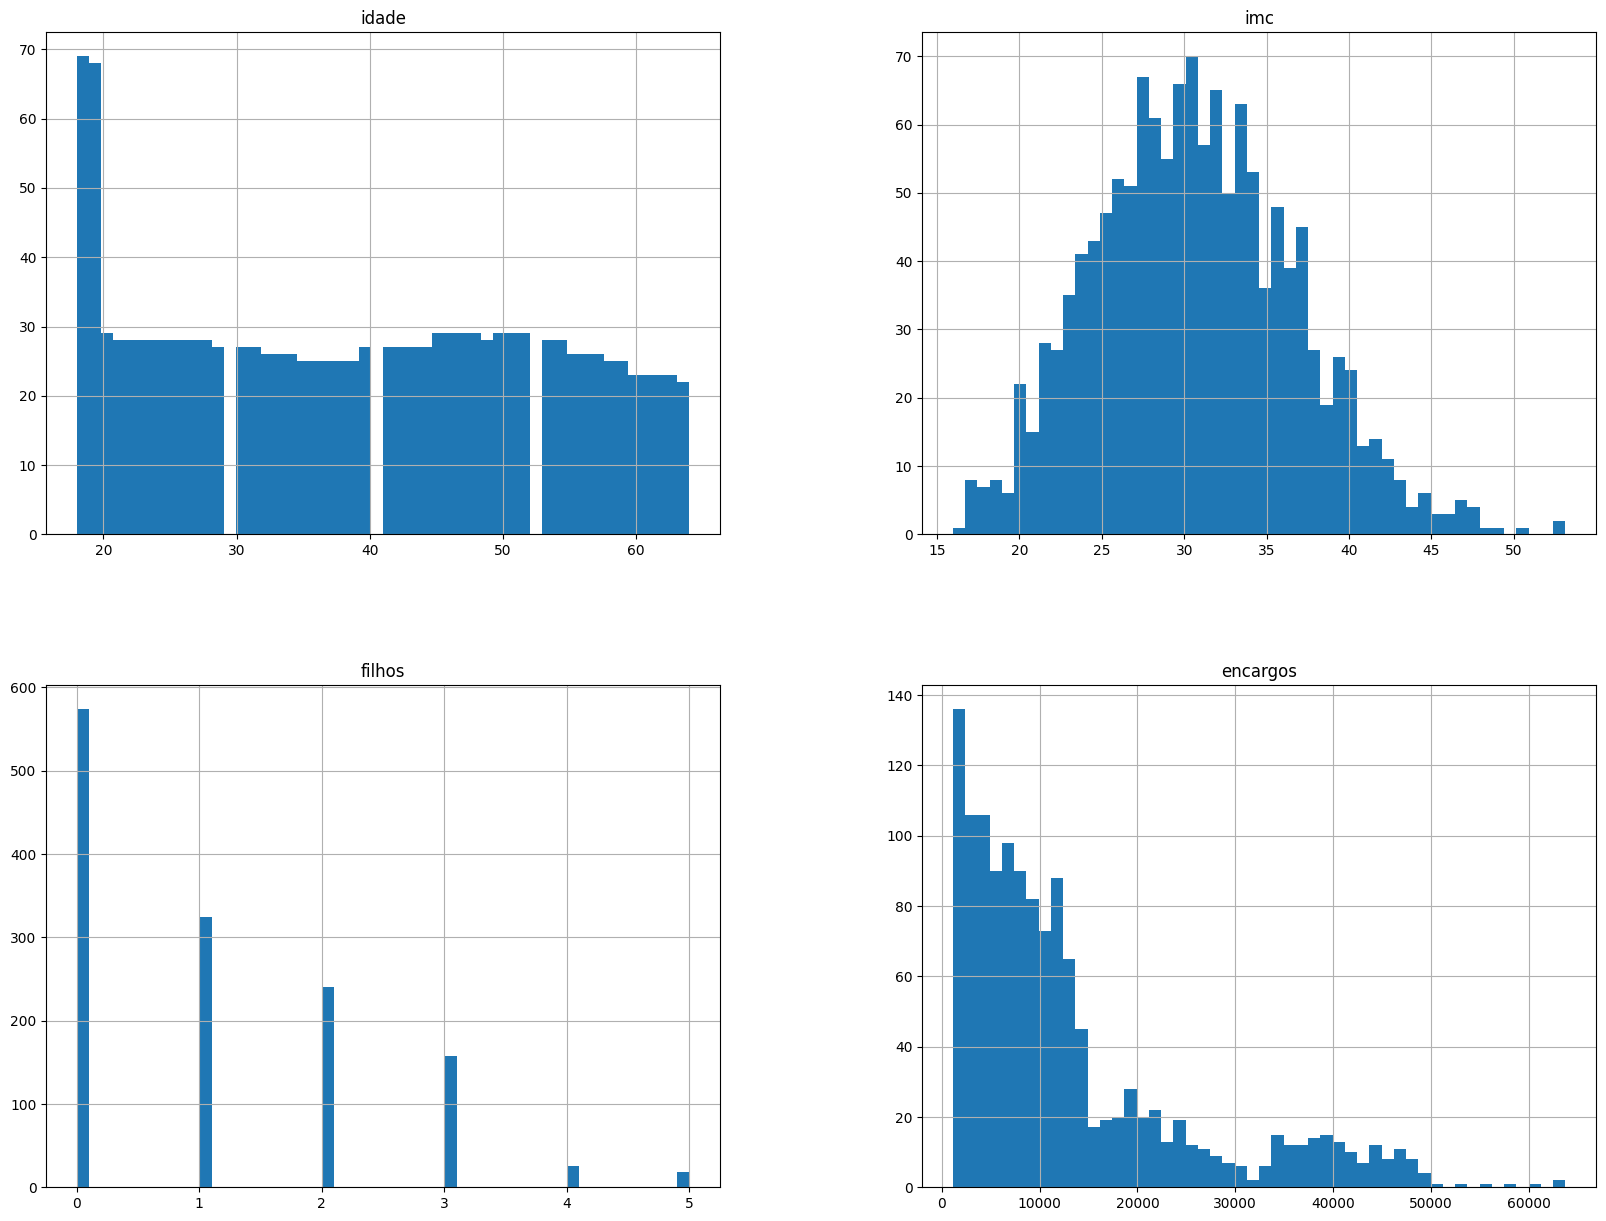

In [ ]:
df.hist(bins=50, figsize=(20,15))

<Axes: >

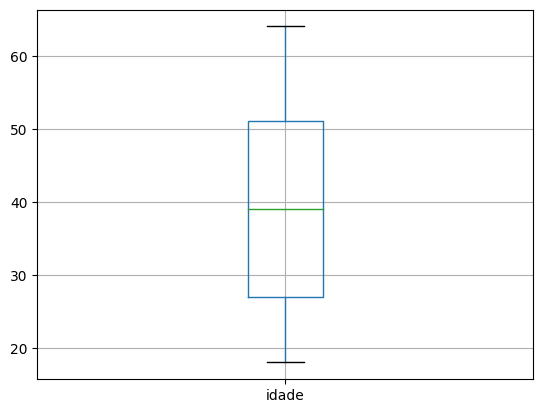

In [ ]:
df.boxplot(column="idade")

<Axes: >

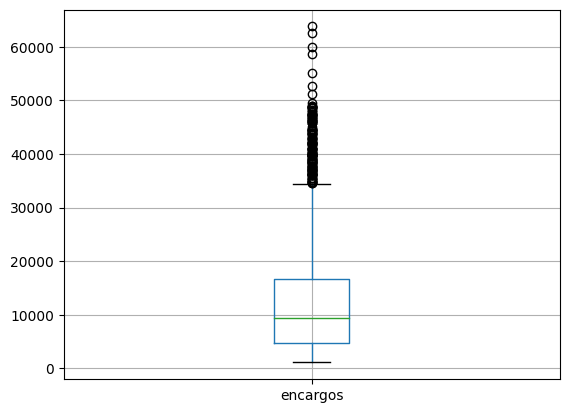

In [ ]:
df.boxplot(column="encargos")

<Axes: >

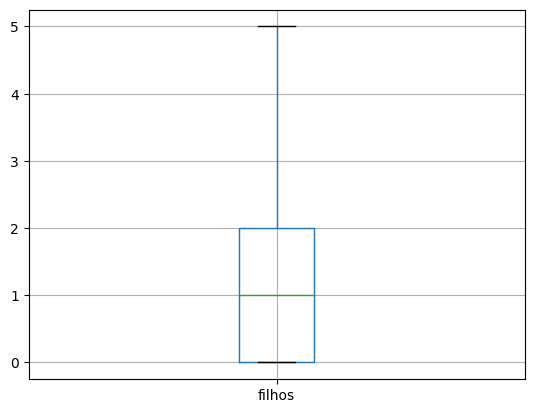

In [ ]:
df.boxplot(column="filhos")

> Podemos ver que temos possíveis outliers nos encargos

### Quais variávels podem ter mais impacto/correlação com resultado?


O nosso problema é:

> Você é um profissional encarregado de desenvolver um modelo preditivo
de regressão para prever o valor dos custos médicos individuais cobrados pelo
seguro de saúde.

Vamos então criar hipóteses...

In [ ]:
# Criar uma função para ajudar nas hipóteses
def plot_hypotheses(x, y, x_title, y_title, df):
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
  sns.histplot(data=df[x], kde=True, ax=axes[0])
  axes[0].set_title(x_title)

  sns.histplot(data=df[y], kde=True, ax=axes[1])
  axes[1].set_title(y_title)

  sns.scatterplot(x=x, y=y, data=df, ax=axes[2])
  axes[2].set_title('Gráfico de dispersão')

  plt.tight_layout()
  plt.show()

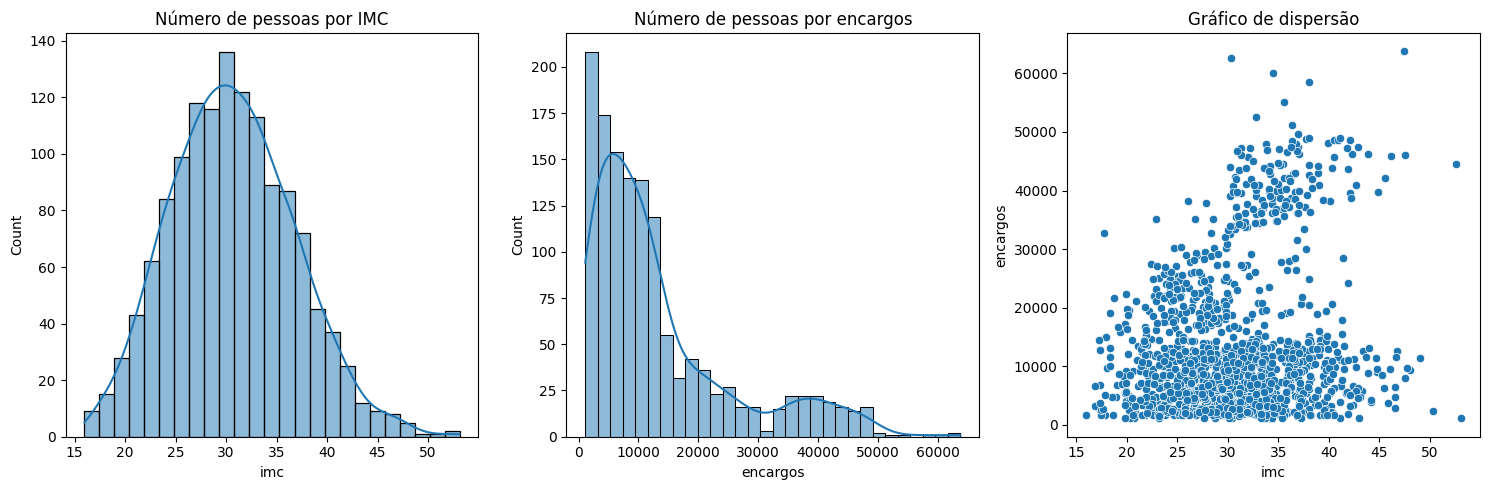

In [ ]:
# Hipótese: Pessoas de alto IMC, gastam mais com saúde
plot_hypotheses('imc', 'encargos', 'Número de pessoas por IMC', "Número de pessoas por encargos", df)

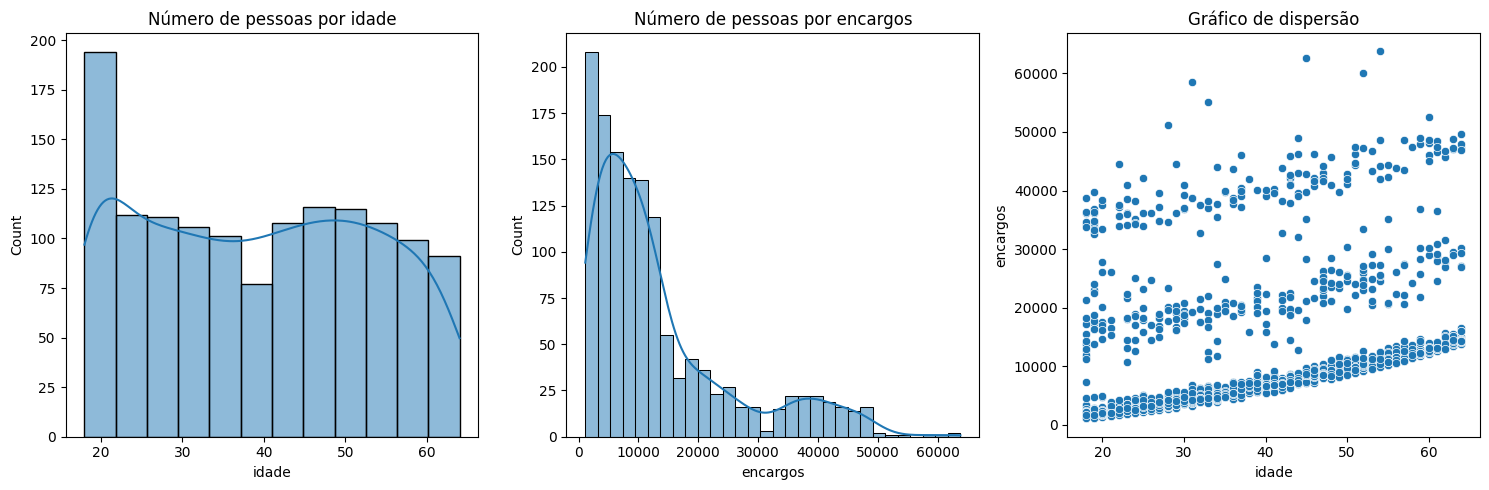

In [ ]:
# Hipótese: Pessoas mais velhas gastam mais com saúde
plot_hypotheses('idade', 'encargos', 'Número de pessoas por idade', "Número de pessoas por encargos", df)

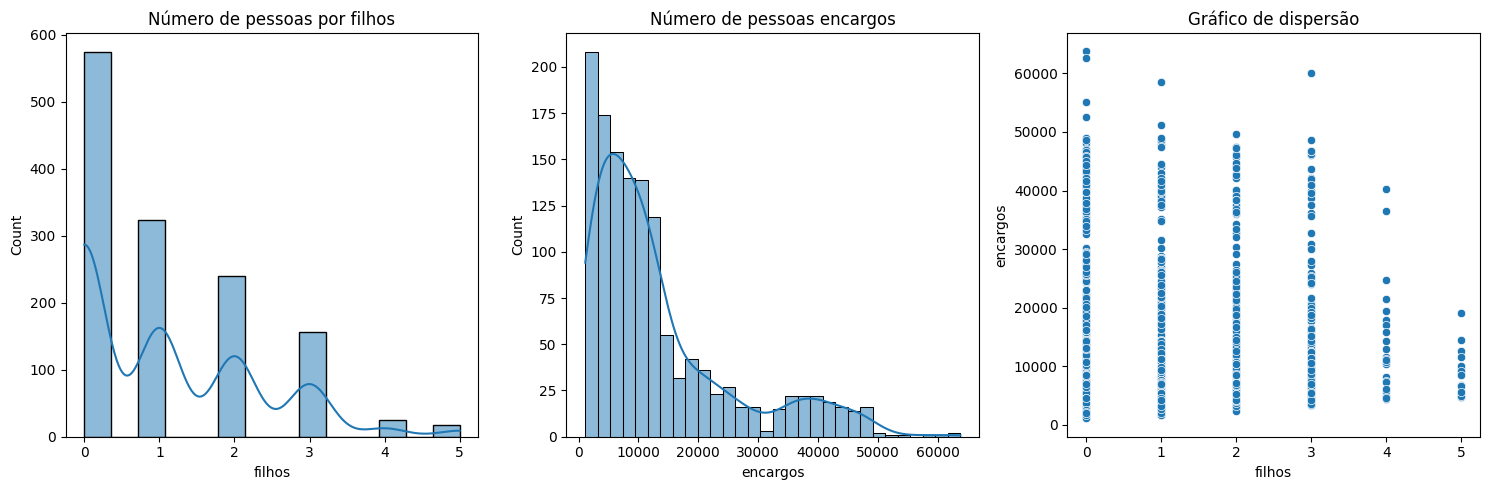

In [ ]:
# Hipótese: Pessoas com mais filhos gastam mais com saúde
plot_hypotheses('filhos', 'encargos', 'Número de pessoas por filhos', "Número de pessoas encargos", df)

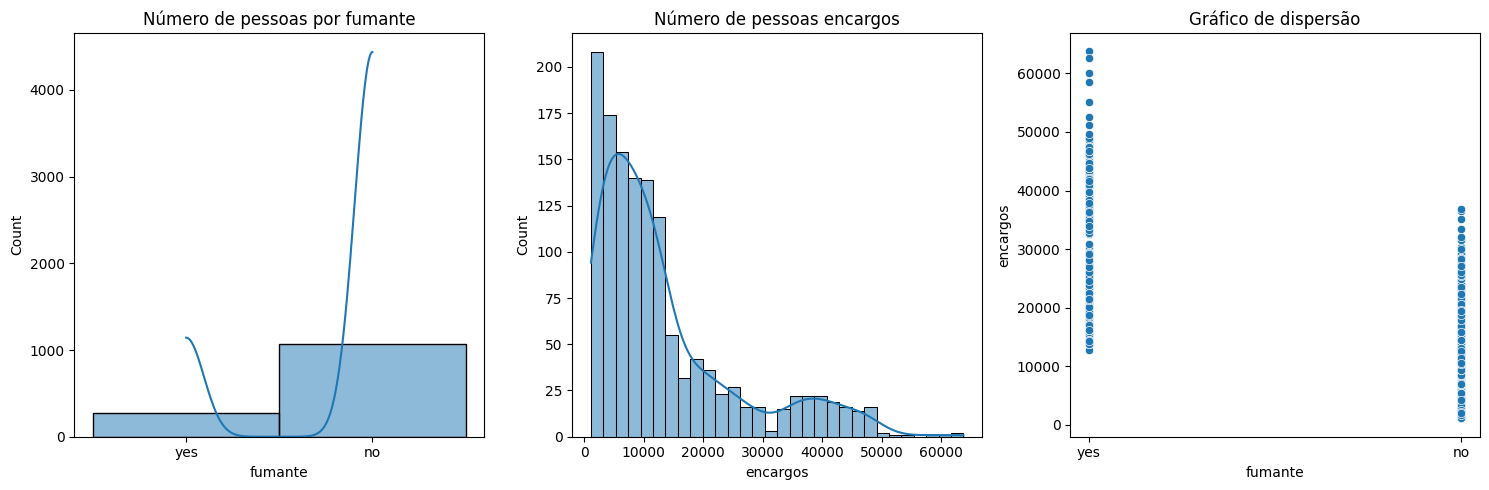

In [ ]:
# Hipótese: Fumantes gastam mais com saúde
plot_hypotheses('fumante', 'encargos', 'Número de pessoas por fumante', "Número de pessoas encargos", df)

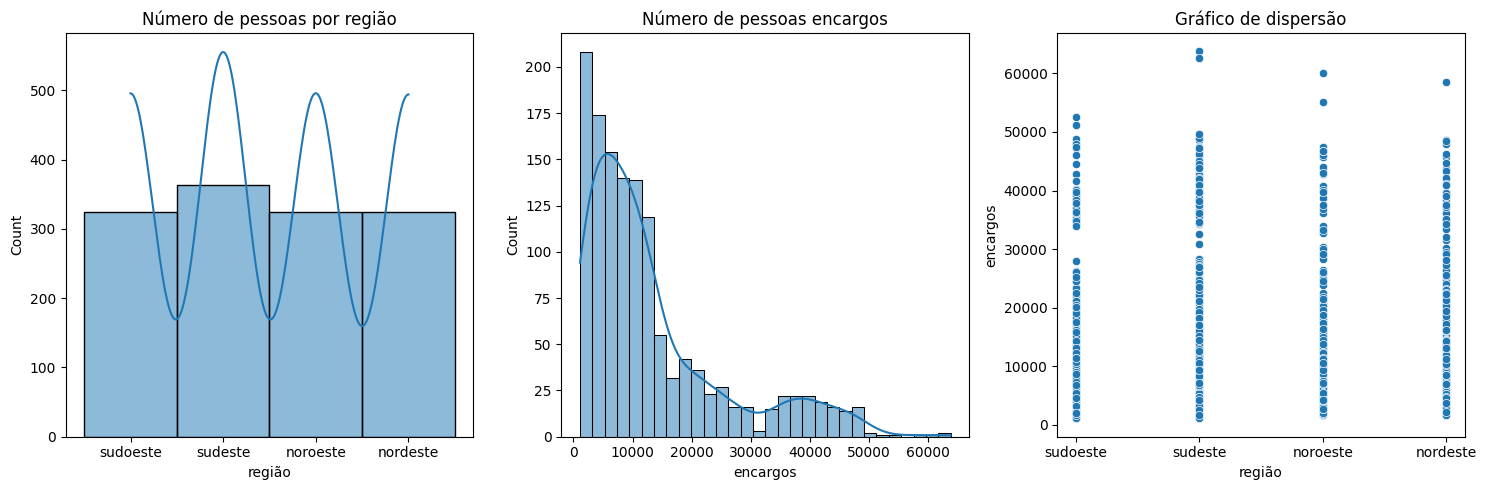

In [ ]:
# Hipótese: Pessoas de uma certa região gastam mais com saúde
plot_hypotheses('região', 'encargos', 'Número de pessoas por região', "Número de pessoas encargos", df)

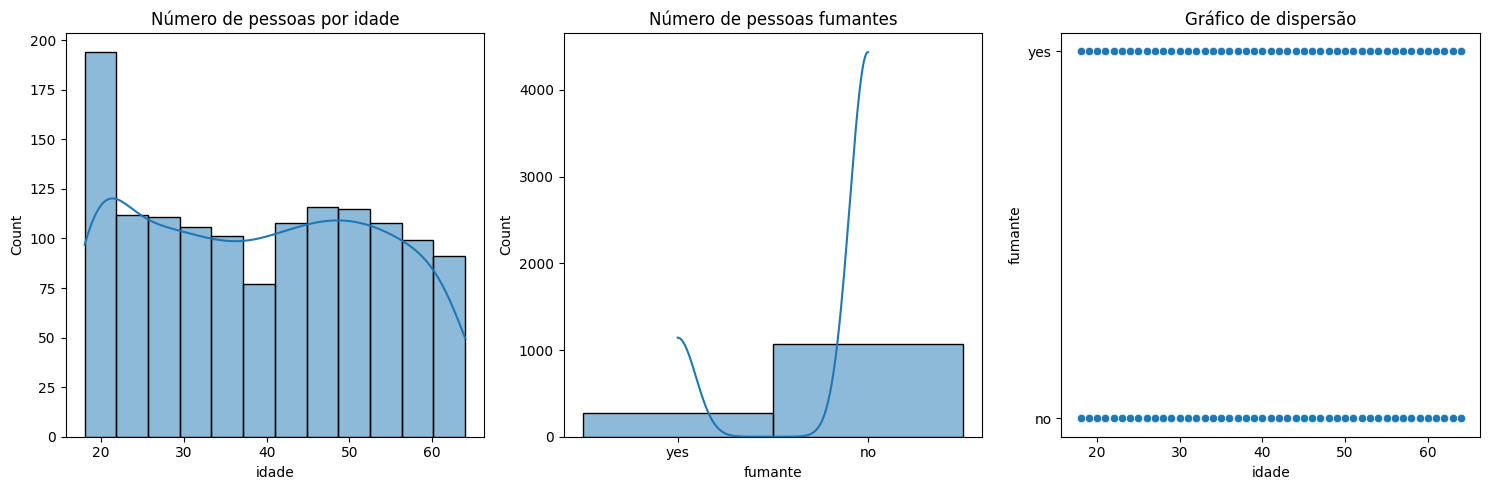

In [ ]:
# Hipótese: Pessoas mais velhas fumam mais
plot_hypotheses('idade', 'fumante', 'Número de pessoas por idade', "Número de pessoas fumantes", df)

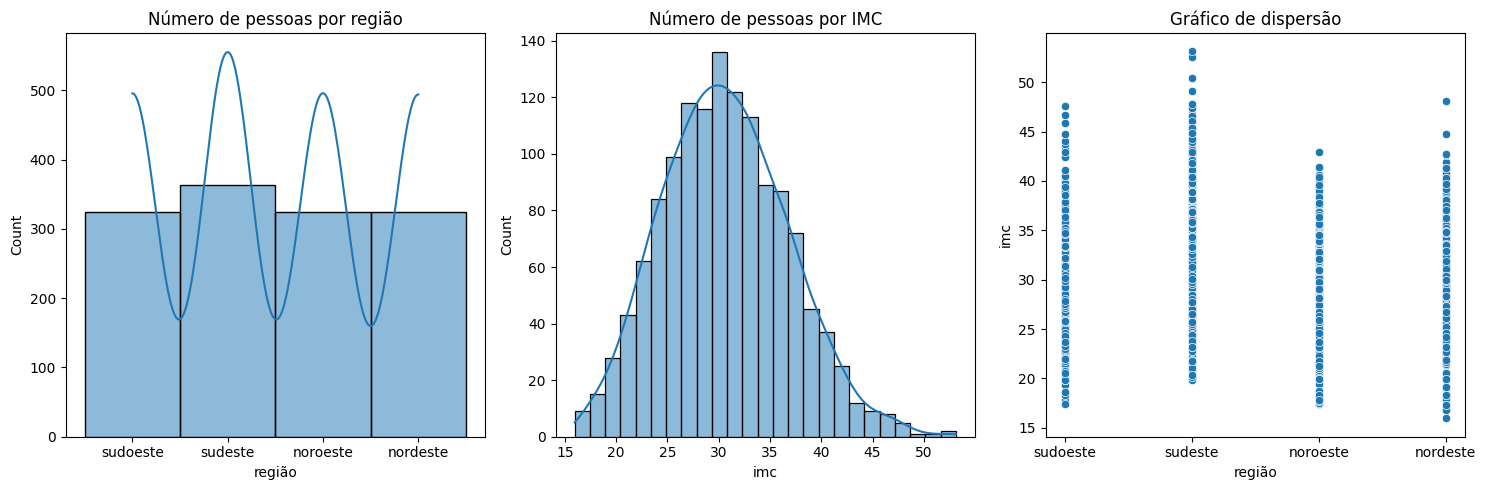

In [ ]:
# Hipótese: A região afeta o IMC das pessoas
plot_hypotheses('região', 'imc', 'Número de pessoas por região', "Número de pessoas por IMC", df)

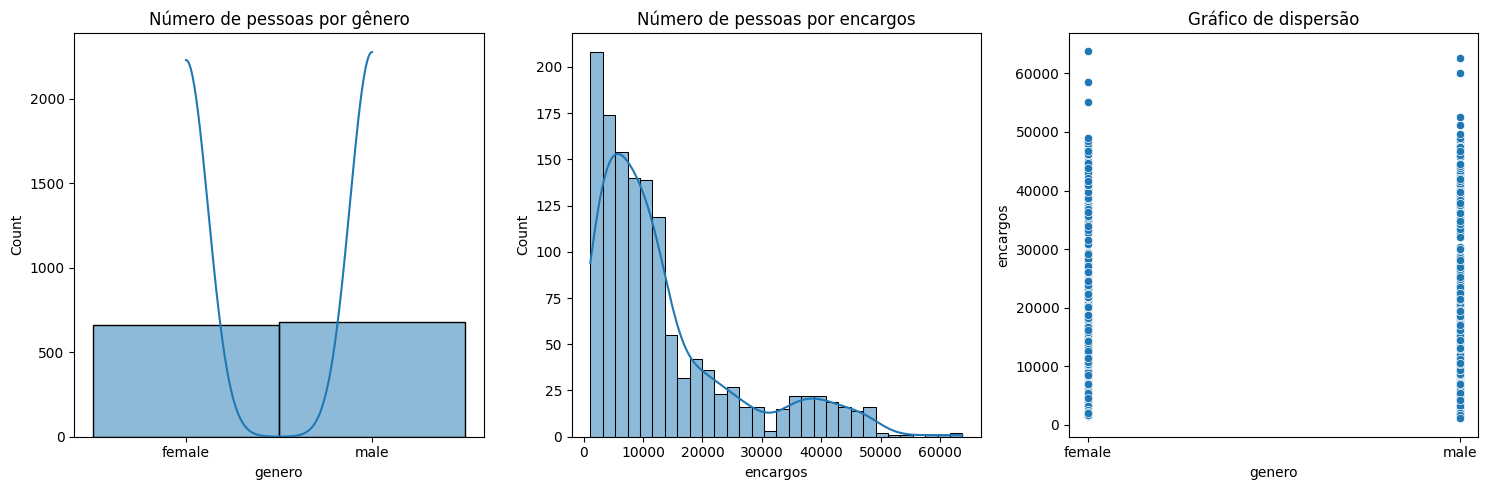

In [ ]:
# Hipótese: Homens gastam menos com saúde que mulheres
plot_hypotheses('genero', 'encargos', 'Número de pessoas por gênero', "Número de pessoas por encargos", df)

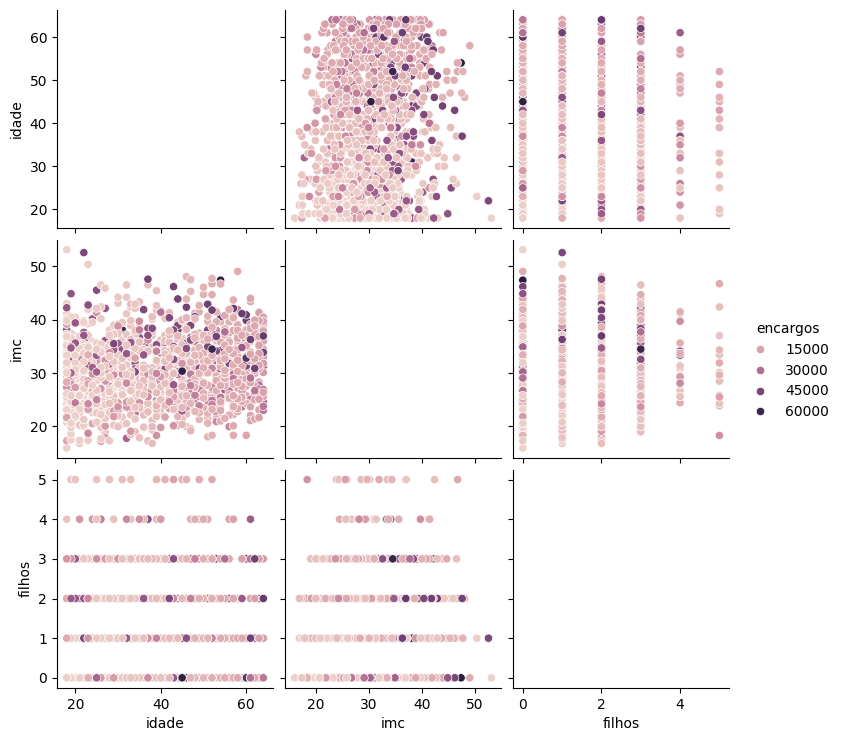

In [ ]:
sns.pairplot(df, hue='encargos')

Pontos observados:

- pessoas sem filhos gastam consideravelmente com saúde
- fumantes gastam mais com saúde
- pessoas que tem um IMC maior gastam mais com saúde
- pessoas mais velhas gastam mais com saúde
- pessoas da região sudeste tentem a ter um IMC maior !!!!!!

## Correlação das variáveis

<Axes: >

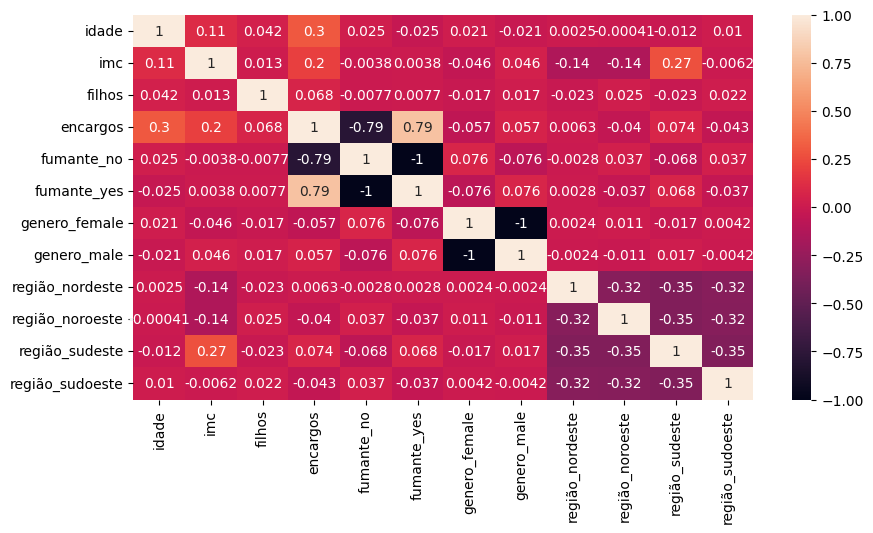

In [ ]:
correlation = dum_df.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(correlation, annot=True)

Parece que nossas hiptóse estavam certas:

- **fumantes** tem correlação forte com **encargos**
- **IMC** tem correlação forte com **encargos**
- **idade** tem correlação forte com **ecanrgos**
- **região (sudeste)** tem correlação forte com **IMC**

In [ ]:
features = [
'idade',
'imc',
'filhos',
'fumante_no',
'fumante_yes',
'genero_female',
'genero_male',
'região_nordeste',
'região_noroeste',
'região_sudeste',
'região_sudoeste',
]

X = dum_df[features]
y = dum_df['encargos']

### Feature Scaling

Já que os dados estão em dimensões diferentes, faz sentido a gente colocar todos em uma mesma escala.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_percentage_error, accuracy_score

## Agora vamos treinar os modelos e pegar as predições

In [ ]:
def train_and_avaliation(X_train, X_test, y_train, y_test, model):
  _model = model()
  _model.fit(X_train, y_train)


  predictions = _model.predict(X_test)

  mse = mean_squared_error(y_test, predictions)
  print(f"Mean Squared Error: {np.sqrt(mse)}")

  r2 = r2_score(y_test, predictions)
  print(f"R-squared: {r2}")

  mape = mean_absolute_percentage_error(y_test, predictions)
  print(f"Mean Absolute Percentage Error: {mape}")


  return [predictions, _model]

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
predictions_linear_regression, model_linear_regression = train_and_avaliation(X_train, X_test, y_train, y_test, LinearRegression)

Mean Squared Error: 5796.284659276274
R-squared: 0.7835929767120722
Mean Absolute Percentage Error: 0.4688825597914673


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
predictions_random_forest, model_random_forest = train_and_avaliation(X_train, X_test, y_train, y_test, RandomForestRegressor)

Mean Squared Error: 4612.478496241667
R-squared: 0.8629621145766391
Mean Absolute Percentage Error: 0.30009012952839026


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
predictions_decision_tree, model_decision_tree = train_and_avaliation(X_train, X_test, y_train, y_test, DecisionTreeRegressor)

Mean Squared Error: 6659.35367611293
R-squared: 0.7143487682158054
Mean Absolute Percentage Error: 0.42079399650020066


## Vamos avaliar qual modelo fica melhor?

Vimos que os modelos tiveram os seguintes resultados:

### DecisionTreeRegressor:
- Mean Squared Error: 6956.129976232147
- R-squared: 0.688321161910431
- Mean Absolute Percentage Error: 0.36366583325164364

---

### RandomForestRegressor:
- Mean Squared Error: 4635.098175137945
- R-squared: 0.8616147463059591
- Mean Absolute Percentage Error: 0.30879172306055314

---

### LinearRegression:
- Mean Squared Error: 5829.17293025419
- R-squared: 0.7811302113434095
- Mean Absolute Percentage Error: 0.4803556784658598
---

Podemos concluir que o **RandomForestRegressor** teve o melhor desempenho, pois nossa base de treino explica **86%** da base de treino

## Usando na prática

In [ ]:
# idade, IMC, Filhos, Não fumante, Fumante, Feminino, Masculino, região_nordeste,	região_noroeste,	região_sudeste,	região_sudoeste
input = [
    # [57, 18.663397, 0, True, False, False, True, True, False, False, False], # -> 11651.8686007
    # [41, 47.23400097, 4, True, False, True, False, False, True, False, False], # -> 8294.892483
    # [60, 35.58078016, 2, False, True, True, False, False, False, True, False], # -> 47223.9506113
    # [26, 55.57115284, 1, True, False, False, True, False, False, False, True]  # -> 3354.2149483
    # [57, 26.63485824, 1, False, True, False, True, True, False, False, False] -> 27079.1290533 1 filho
    # [57, 26.63485824, 0, True, False, False, True, True, False, False, False] -> 11907.1172724 não fumante
    # [27, 26.63485824, 0, False, True, False, True, True, False, False, False] -> 19228.3072299 mais novo
    # [57, 56.63485824, 0, False, True, False, True, True, False, False, False] -> 47800.2026609 IMC alto
    # [57, 56.63485824, 1, True, False, False, True, True, False, False, False] -> 13253.897096 não fumante e IMC alto
    [57, 26.63485824, 0, False, True, True, False, True, False, False, False] # -> 26420.3128119
]

charges = model_random_forest.predict(input)
print(f"Encargos: {charges}")

Encargos: [26828.5641805]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Resumo:



---